# KNN

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [152]:
data = pd.read_csv("D:\Ineuron Data Science\Data\glass.csv")

In [153]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [154]:
data.shape

(214, 10)

In [155]:
data['Type'].value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [156]:
data.duplicated().sum()

1

In [157]:
data = data.drop_duplicates()

In [158]:
data.duplicated().sum()

0

In [159]:
x = data.iloc[:,:-1]

In [160]:
y = data.iloc[:,-1]

In [161]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [162]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### Wherever we have a distance in the algo will use the scalling 
#### to scale the data into same scale this scalling is required

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [164]:
# scalling 
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [165]:
x_train_sc

array([[0.26558385, 0.39849624, 0.87939698, ..., 0.27881041, 0.        ,
        0.        ],
       [0.35162423, 0.51428571, 0.        , ..., 0.50650558, 0.        ,
        0.        ],
       [0.45522388, 0.34887218, 0.91708543, ..., 0.41078067, 0.        ,
        0.33333333],
       ...,
       [0.54872695, 0.76090226, 0.45979899, ..., 0.29553903, 0.53333333,
        0.        ],
       [0.23046532, 0.54736842, 0.        , ..., 0.37360595, 0.17142857,
        0.        ],
       [0.28050922, 0.41353383, 0.93969849, ..., 0.24163569, 0.        ,
        0.        ]])

In [166]:
x_test_sc

array([[0.22587269, 0.3442623 , 0.79064588, 0.27822581, 0.58690176,
        0.10950081, 0.15662651, 0.        , 0.        ],
       [0.32648871, 0.26229508, 0.77505568, 0.34274194, 0.5440806 ,
        0.09500805, 0.20080321, 0.        , 0.        ],
       [0.3045859 , 0.54098361, 0.80178174, 0.32258065, 0.56675063,
        0.07729469, 0.12048193, 0.        , 0.        ],
       [0.22518823, 0.35655738, 0.80400891, 0.39516129, 0.48110831,
        0.10628019, 0.14725569, 0.        , 0.        ],
       [0.26899384, 0.17622951, 0.77282851, 0.49596774, 0.56423174,
        0.10628019, 0.16733601, 0.        , 0.        ],
       [0.34360027, 0.47131148, 0.        , 0.        , 1.        ,
        0.        , 0.54350736, 0.        , 0.        ],
       [0.32648871, 0.09016393, 0.77951002, 0.22580645, 0.64231738,
        0.10305958, 0.24631861, 0.        , 0.        ],
       [0.28131417, 0.87295082, 0.        , 0.71774194, 0.70528967,
        0.        , 0.27041499, 0.39520958, 0.        ],


In [167]:
def knn_training(x_train_sc,y_train,x_test_sc,k):
    '''
    x_train = traning data
    y_train = label for the training
    x_test = it is for validation 
    k = number of nearest neighbour
    '''

    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_sc,y_train) 
    prediction = knn.predict(x_test_sc)
    return prediction

1. how to decide the number of k 
* heuristics method = sqrt of total record = this as a nearest neighbor 
* based on research = you can take diff diff values of k = starting from 1 to n<br> n = total number of instences


2. pros and cons of knn



In [168]:
import math
n = data.shape[0]
k = math.sqrt(n)

In [169]:
k = int(k)

In [170]:
pred = knn_training(x_train_sc,y_train,x_test_sc,k)

In [171]:
print(pred)

[1 1 1 2 2 6 1 7 6 5 1 1 7 2 2 1 2 2 7 2 2 1 7 1 7 1 2 7 1 2 2 7 7 2 1 1 1
 1 1 2 5 1 2 2 2 2 1 2 1 1 1 1 2 2]


In [172]:
accuracy_score(y_test,pred)

0.7037037037037037

New approch here we will decide the k value

In [173]:
k_value = range(1,21)
accuracy=[]

for k in k_value:
    y_pred = knn_training(x_train_sc,y_train,x_test_sc,k)
    accur = accuracy_score(y_test,y_pred)
    accuracy.append(accur)
    print(f"for this k value {k} this is my accuracy {accur} ")

for this k value 1 this is my accuracy 0.5925925925925926 
for this k value 2 this is my accuracy 0.6851851851851852 
for this k value 3 this is my accuracy 0.7222222222222222 
for this k value 4 this is my accuracy 0.7592592592592593 
for this k value 5 this is my accuracy 0.8333333333333334 
for this k value 6 this is my accuracy 0.7592592592592593 
for this k value 7 this is my accuracy 0.7222222222222222 
for this k value 8 this is my accuracy 0.7592592592592593 
for this k value 9 this is my accuracy 0.7037037037037037 
for this k value 10 this is my accuracy 0.6851851851851852 
for this k value 11 this is my accuracy 0.6851851851851852 
for this k value 12 this is my accuracy 0.7037037037037037 
for this k value 13 this is my accuracy 0.7037037037037037 
for this k value 14 this is my accuracy 0.7037037037037037 
for this k value 15 this is my accuracy 0.7037037037037037 
for this k value 16 this is my accuracy 0.6666666666666666 
for this k value 17 this is my accuracy 0.6851851

In [174]:
max(accuracy)

0.8333333333333334

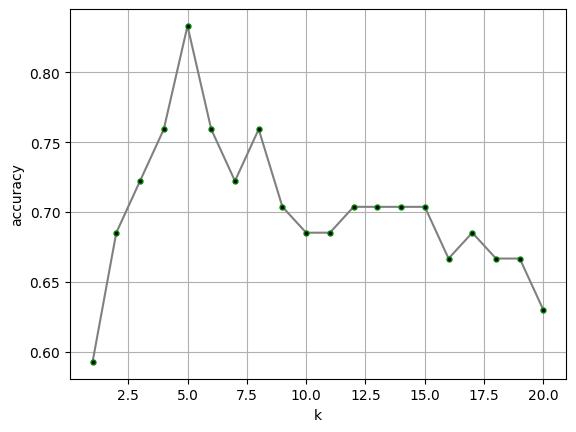

In [175]:
plt.plot(k_value,accuracy,c="grey",marker = ".",ms=7,mfc="black",mec="green")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

In [1]:
# Diffrence between kmean and kmean clustoring